In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.datasets.samples_generator import make_blobs
import sklearn.linear_model
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import import_ipynb
from HelperFunctions import relu,sigmoid,loss
np.random.seed(1) # set a seed so that the results are consistent
#from ipynb.fs.full.HelperFunctions import *

importing Jupyter notebook from HelperFunctions.ipynb
Sigmoid at 0 is 0.5
relu at 0 is 0
relu at -ve is 0
relu at +ve is [[0 0 1 2]
 [0 0 0 0]]
1.8986161189963753


In [ ]:
'''from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, Y = make_blobs(n_samples=200, centers=2, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()'''


In [2]:
#data_to_test the algorithm
from sklearn.datasets import load_iris
data=load_iris()
X=data.data
Y=data.target
Y[Y>0]=1
feature_mean=np.mean(X,axis=0)
feature_SD=np.std(X,axis=0)
X=(X-feature_mean)/feature_SD
X
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [3]:
Y.reshape((Y.shape[0],1))
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 4)
(50, 4)
(100,)
(50,)


In [4]:
x_train=x_train.T
x_test=x_test.T
y_train=y_train.reshape((y_train.shape[0],1))
y_train=y_train.T
y_test=y_test.reshape((y_test.shape[0],1))
y_test=y_test.T
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4, 100)
(4, 50)
(1, 100)
(1, 50)


In [5]:
#Intialize Model Parameters

class MultiLayerNueralNet():
    
    
    def __init__(self,num_input,num_hidden,num_output):
        
        """
        
        intialize class  instance variables 
        Argument:
        num_input -- size of the input layer
        num_hidden -- size of the hidden layer
        num_ouput -- size of the output layer
        
        """
        np.random.seed(2)
        self.num_input=num_input
        self.num_hidden=num_hidden
        self.num_output=num_output
        self.W1=np.random.rand(num_hidden,num_input)
        self.W2=np.random.rand(num_output,num_hidden)*0.01
        self.b1=np.zeros((num_hidden,1))
        self.b2=np.zeros((num_output,1))
        self.cache={"Z1": None,"A1": None,"Z2": None,"A2": None}
        self.grad_cache={"dW1": None,"dW2": None,"db1": None,"db2": None}
        
   
    
    def forward_propgation(self,X):
        
        W1=self.W1
        W2=self.W2
        b1=self.b1
        b2=self.b2
        Z1=np.dot(W1,X)+b1
        A1=sigmoid(Z1)
        Z2=np.dot(W2,A1)+b2
        A2=sigmoid(Z2)
        self.cache["Z1"]=Z1
        self.cache["A1"]=A1
        self.cache["Z2"]=Z2
        self.cache["A2"]=A2
        return A2
    
    def backward_propagation(self,X,Y):
    
        #one_hot_y=np.eye(3)[Y]
        m=X.shape[1]
        W1=self.W1
        W2=self.W2
        b1=self.b1
        b2=self.b2
        Z1=self.cache["Z1"]
        A1=self.cache["A1"]
        Z2=self.cache["Z2"]
        A2=self.cache["A2"]
    
        dZ2=A2 - Y
        dW2=(1./m)*np.dot(dZ2,A1.T)
        db2=(1./m)*np.sum(dZ2,axis=1, keepdims = True)
        #dZ1=np.dot(W2.T,dZ2)*A1*(1-A1)
        dZ1=np.multiply(np.dot(W2.T,dZ2),np.int64(A1 > 0))
        dW1=(1./m)*np.dot(dZ1,X.T)
        db1=(1./m)*np.sum(dZ1,axis=1, keepdims = True)
        self.grad_cache["dW1"]=dW1
        self.grad_cache["dW2"]=dW2
        self.grad_cache["db1"]=db1
        self.grad_cache["db2"]=db2
        
    #def gradient_check():
        
    
    
    def train(self,x_train,y_train,x_test,y_test,num_iterations,learning_rate=10):
        
        train_loss=[]
        test_loss=[]
        m_train=y_train.shape[1]
        m_test=y_test.shape[1]
        #one_hot_y=np.eye(3)[y_train]
        for i in range(num_iterations):
            
            self.forward_propgation(x_train)
            self.backward_propagation(x_train,y_train)
            self.W1=self.W1-learning_rate*self.grad_cache["dW1"]
            print(self.W1)
            self.W2=self.W2-learning_rate*self.grad_cache["dW2"]
            self.b1=self.b1-learning_rate*self.grad_cache["db1"]
            self.b2=self.b2-learning_rate*self.grad_cache["db2"]
            print
            #this.optimized_cache["b1"]=this.optimized_cache["b1"]-learning_rate*this.grad_cache["db1"]
            #this.optimized_cache["b2"]=this.optimized_cache["b2"]-learning_rate*this.grad_cache["db2"]    
               
            #print(self.cache["A2"])
            #print(one_hot_y)
            if((i%10)==0):
                
                print("The train loss is",loss(m_train,self.cache["A2"],y_train))
                train_loss.append(loss(m_train,self.cache["A2"],y_train))
                self.forward_propgation(x_test)
                print("The val loss is",loss(m_test,self.cache["A2"],y_test))
                test_loss.append(loss(m_test,self.cache["A2"],y_test))
        return train_loss,test_loss
    
    def predict(self,x):
        
        y_pred=self.forward_propgation(x_test)[0][0]
        if (y_pred>=0.5):
                return 1
        else: 
            return 0
        
    def accuracy(self,x,y):
        y_pred=self.forward_propgation(x)
        y_pred[y_pred>=0.5]=1
        y_pred[y_pred<0.5]=0
        return (np.sum(y_pred==y)/y.size)*100
        
      
    
        
        
        

In [6]:
nueralnet=MultiLayerNueralNet(x_train.shape[0],1,1)
A2=nueralnet.forward_propgation(x_train)
print(loss(134,A2,y_train))
logprobs = np.multiply(-np.log(A2),y_train) + np.multiply(-np.log(1 - A2), 1 - y_train)
cost = 1./134 * np.sum(logprobs)
print(cost)  

0.5166319448226169
0.5166319448226169


In [7]:
nueralnet=MultiLayerNueralNet(x_train.shape[0],1,1)
nueralnet.forward_propgation(x_train)
nueralnet.backward_propagation(x_train,y_train)
train_loss,test_loss=nueralnet.train(x_train,y_train,x_test,y_test,1000)

[[0.4491395  0.01408802 0.56733023 0.45216673]]
The train loss is 0.6922868060623067
The val loss is 0.9032810428940357
[[ 6.62639946 -4.5781701   8.28203879  7.84826676]]
[[ 9.4020211  -8.5010458  12.74101441 12.03152649]]
[[ 15.90026325 -13.91378806  21.1129068   20.07907203]]
[[ 18.57794506 -18.46927121  25.76343989  24.50832192]]
[[ 22.38332867 -23.28256862  31.45260411  29.95775214]]
[[ 25.21190604 -27.83467661  36.17534647  34.47027752]]
[[ 27.9653265  -32.31289398  40.80808521  38.94116105]]
[[ 30.42957197 -36.70406425  45.10248405  43.11360042]]
[[ 32.85782642 -40.73116837  49.1654382   47.09233431]]
[[ 35.15228261 -44.39648185  52.93628987  50.80731373]]
The train loss is 0.11206681954717963
The val loss is 0.11165192595339864
[[ 37.21075104 -47.93728977  56.42198982  54.26001981]]
[[ 39.08809001 -51.41636694  59.69916136  57.52272461]]
[[ 40.81460047 -54.85662222  62.81048936  60.63421442]]
[[ 42.41365693 -58.27004569  65.78656275  63.62221222]]
[[ 43.90383216 -61.66425277  6

HelperFunctions.ipynb:3: RuntimeWarning: overflow encountered in exp
  {


[[ 127.16074941 -187.39171815  198.82922719  201.86092066]]
[[ 127.22017525 -187.42614172  198.90645025  201.93505113]]
[[ 127.27946162 -187.46046815  198.98348459  202.00899619]]
[[ 127.33860907 -187.49469807  199.06033109  202.08275679]]
[[ 127.39761818 -187.52883211  199.13699063  202.15633385]]
[[ 127.45648953 -187.56287091  199.21346408  202.22972828]]
[[ 127.51522367 -187.59681507  199.28975233  202.30294099]]
The train loss is 0.0015434720456037924
The val loss is 0.001665303602429924
[[ 127.57382118 -187.6306652   199.36585623  202.3759729 ]]
[[ 127.63228262 -187.6644219   199.44177664  202.44882489]]
[[ 127.69060856 -187.69808577  199.51751441  202.52149787]]
[[ 127.74879956 -187.73165738  199.59307042  202.59399271]]
[[ 127.80685618 -187.76513733  199.66844549  202.66631031]]
[[ 127.86477899 -187.79852618  199.74364047  202.73845153]]
[[ 127.92256854 -187.8318245   199.81865621  202.81041725]]
[[ 127.98022539 -187.86503285  199.89349353  202.88220833]]
[[ 128.0377501  -187.89

[[ 137.48660951 -193.85154256  212.62443674  214.93586044]]
[[ 137.51839043 -193.87169653  212.66719501  214.97607163]]
[[ 137.55012523 -193.89182072  212.70989089  215.01622396]]
[[ 137.58181403 -193.91191523  212.75252456  215.05631762]]
[[ 137.61345698 -193.93198015  212.7950962   215.09635277]]
[[ 137.6450542  -193.95201558  212.837606    215.13632959]]
[[ 137.67660582 -193.97202161  212.88005413  215.17624827]]
[[ 137.70811197 -193.99199834  212.92244079  215.21610897]]
The train loss is 0.0008618749506436168
The val loss is 0.0009422186437150302
[[ 137.73957279 -194.01194586  212.96476614  215.25591186]]
[[ 137.7709884  -194.03186427  213.00703038  215.29565712]]
[[ 137.80235894 -194.05175365  213.04923369  215.33534493]]
[[ 137.83368452 -194.0716141   213.09137623  215.37497544]]
[[ 137.86496529 -194.09144572  213.1334582   215.41454884]]
[[ 137.89620137 -194.11124858  213.17547976  215.45406529]]
[[ 137.92739288 -194.13102279  213.2174411   215.49352496]]
[[ 137.95853995 -194.1

[[ 146.0077735  -199.61574825  224.16842569  225.76572954]]
[[ 146.02715715 -199.62936466  224.19479897  225.79043681]]
[[ 146.0465227  -199.64296837  224.22114763  225.81512101]]
[[ 146.06587018 -199.65655941  224.2474717   225.83978218]]
[[ 146.08519963 -199.67013779  224.27377124  225.86442037]]
[[ 146.10451108 -199.68370354  224.30004629  225.88903561]]
[[ 146.12380456 -199.69725669  224.32629691  225.91362796]]
[[ 146.14308012 -199.71079726  224.35252314  225.93819747]]
The train loss is 0.0005374542362557888
The val loss is 0.0005878714313687156
[[ 146.16233779 -199.72432528  224.37872503  225.96274417]]
[[ 146.1815776  -199.73784077  224.40490262  225.98726811]]
[[ 146.20079959 -199.75134375  224.43105597  226.01176934]]
[[ 146.22000379 -199.76483425  224.45718512  226.0362479 ]]
[[ 146.23919024 -199.7783123   224.48329013  226.06070384]]
[[ 146.25835897 -199.79177791  224.50937103  226.0851372 ]]
[[ 146.27751003 -199.80523112  224.53542787  226.10954802]]
[[ 146.29664343 -199.8

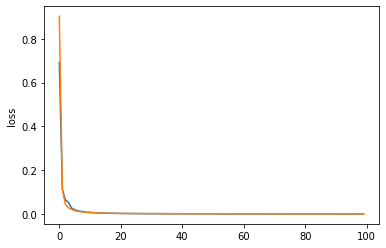

In [8]:
import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.plot(test_loss)
plt.ylabel('loss')
plt.show()

In [9]:
feature=np.array([-1.14452391, -1.19360307])
print(nueralnet.accuracy(x_test,y_test))

100.0


In [10]:
x_test

array([[ 3.10997534e-01, -1.73673948e-01,  2.24968346e+00,
         1.89829664e-01,  1.15917263e+00, -5.37177559e-01,
        -2.94841818e-01,  1.28034050e+00,  4.32165405e-01,
        -5.25060772e-02,  7.95669016e-01, -1.26418478e+00,
        -4.16009689e-01, -1.14301691e+00, -9.00681170e-01,
         5.53333275e-01,  7.95669016e-01, -2.94841818e-01,
        -1.73673948e-01,  6.74501145e-01, -1.38535265e+00,
         3.10997534e-01, -1.02184904e+00,  6.74501145e-01,
         2.49201920e+00,  1.03800476e+00,  1.03800476e+00,
         1.15917263e+00, -1.26418478e+00, -1.26418478e+00,
        -1.50652052e+00, -1.73673948e-01,  1.03800476e+00,
        -1.26418478e+00, -1.74885626e+00,  5.53333275e-01,
         6.74501145e-01, -7.79513300e-01, -1.02184904e+00,
        -7.79513300e-01, -5.25060772e-02,  1.89829664e-01,
         1.03800476e+00, -5.37177559e-01, -5.37177559e-01,
        -4.16009689e-01,  5.53333275e-01,  6.74501145e-01,
         9.16836886e-01,  1.64384411e+00],
       [-5.92